<a href="https://colab.research.google.com/github/yarsha-0610/Data-Science-notebooks/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

train= pd.read_csv('/content/train.csv')



In [42]:
train= pd.read_csv('/content/train.csv')
train = train.dropna()
# test= pd.read_csv('/content/test.csv')


In [43]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [44]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
train_features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin"]]
train_target = train["Survived"]

In [46]:
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
1,1,female,38.0,1,0,71.2833,C85
3,1,female,35.0,1,0,53.1000,C123
6,1,male,54.0,0,0,51.8625,E46
10,3,female,4.0,1,1,16.7000,G6
11,1,female,58.0,0,0,26.5500,C103
...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,D35
872,1,male,33.0,0,0,5.0000,B51 B53 B55
879,1,female,56.0,0,1,83.1583,C50
887,1,female,19.0,0,0,30.0000,B42


In [47]:
train_features['Cabin'].fillna('Unknown', inplace=True)

# Or, Strategy 2: Extract deck from 'Cabin' and fill missing values with 'Unknown'
train_features['Deck'] = train_features['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

<ipython-input-47-850e7ccbe19f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['Cabin'].fillna('Unknown', inplace=True)
<ipython-input-47-850e7ccbe19f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['Deck'] = train_features['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')


In [59]:
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
6,1,1,54.0,0,0,51.8625,0,0,0,0,1,0,0,0
10,3,0,4.0,1,1,16.7000,0,0,0,0,0,0,1,0
11,1,0,58.0,0,0,26.5500,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,1,31.0,0,0,50.4958,1,0,0,0,0,0,0,0
871,1,0,47.0,1,1,52.5542,0,0,0,1,0,0,0,0
872,1,1,33.0,0,0,5.0000,0,1,0,0,0,0,0,0
879,1,0,56.0,0,1,83.1583,0,0,1,0,0,0,0,0


In [58]:
encoded_deck = pd.get_dummies(train_features['Deck'], prefix='Deck')

# Join the encoded df back with the original DataFrame
train_features = pd.concat([train_features, encoded_deck], axis=1)

# Optionally, drop the original 'Deck' column (not required by all models)
train_features = train_features.drop('Deck', axis=1)

KeyError: ignored

In [50]:
train_features=train_features.drop('Cabin', axis=1)

In [51]:
train_features = train_features.iloc[:-1]
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
1,1,female,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
3,1,female,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
6,1,male,54.0,0,0,51.8625,0,0,0,0,1,0,0,0
10,3,female,4.0,1,1,16.7000,0,0,0,0,0,0,1,0
11,1,female,58.0,0,0,26.5500,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,male,31.0,0,0,50.4958,1,0,0,0,0,0,0,0
871,1,female,47.0,1,1,52.5542,0,0,0,1,0,0,0,0
872,1,male,33.0,0,0,5.0000,0,1,0,0,0,0,0,0
879,1,female,56.0,0,1,83.1583,0,0,1,0,0,0,0,0


In [60]:

test = train_features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_features['Sex'] = le.fit_transform(train_features['Sex'])

# train_features['Sex'] = train_features['Sex'].map({'female': 1, 'male': 0})


In [61]:
train_features 

,Pclass,Sex,Age,SibSp,Parch,Fare,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
6,1,1,54.0,0,0,51.8625,0,0,0,0,1,0,0,0
10,3,0,4.0,1,1,16.7000,0,0,0,0,0,0,1,0
11,1,0,58.0,0,0,26.5500,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,1,31.0,0,0,50.4958,1,0,0,0,0,0,0,0
871,1,0,47.0,1,1,52.5542,0,0,0,1,0,0,0,0
872,1,1,33.0,0,0,5.0000,0,1,0,0,0,0,0,0
879,1,0,56.0,0,1,83.1583,0,0,1,0,0,0,0,0


In [65]:
train_target = train_target.iloc[:-1]
train_target


1      1
3      1
6      0
10     1
11     1
      ..
867    0
871    1
872    0
879    1
887    1
Name: Survived, Length: 182, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
# import LabelEncoder as le


In [67]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model Accuracy: ', accuracy)

# Print a more detailed classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Model Accuracy:  0.7837837837837838
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.75      0.90      0.82        20

    accuracy                           0.78        37
   macro avg       0.80      0.77      0.78        37
weighted avg       0.79      0.78      0.78        37

[[11  6]
 [ 2 18]]


## Exploratory Data Analaysis


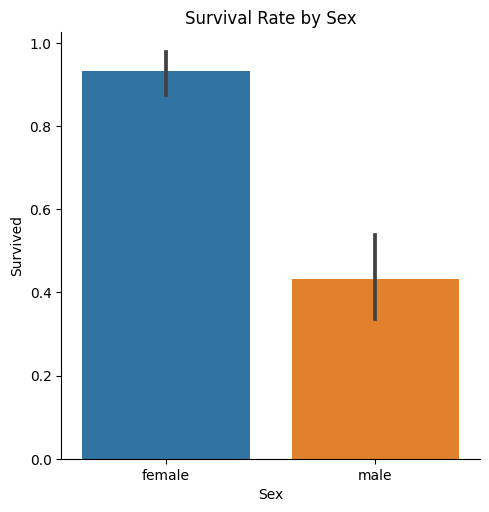

In [73]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=train)
plt.title('Survival Rate by Sex')
plt.show()

<ipython-input-84-1cd608fec157>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[x:='Age'])


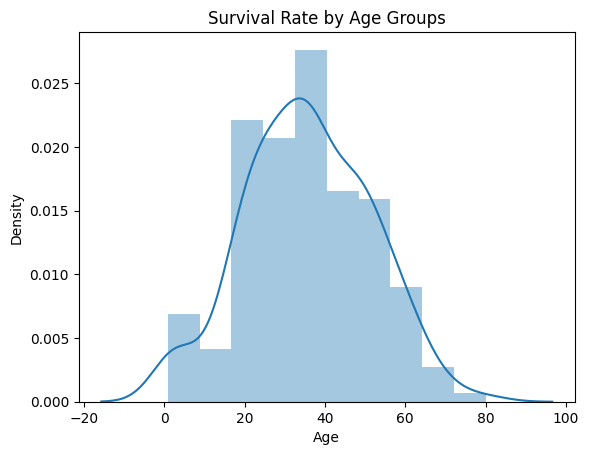

In [84]:
#train_features['AgeBin'] = pd.cut(train_features['Age'].astype(int), 5)

#plt.figure(figsize=(12,6))
sns.distplot(train[x:='Age'])
plt.title('Survival Rate by Age Groups')
plt.show()

<ipython-input-86-ebfe6d388eef>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="Parch", y="Survived", kind="bar", data=train, ci=None)


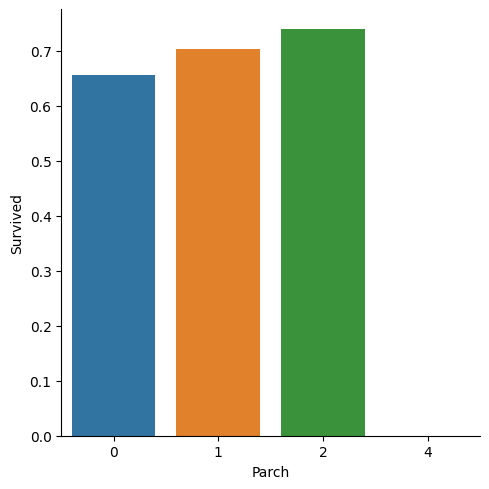

In [86]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=train, ci=None)

<ipython-input-87-0b98a4b3feaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[x:='Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

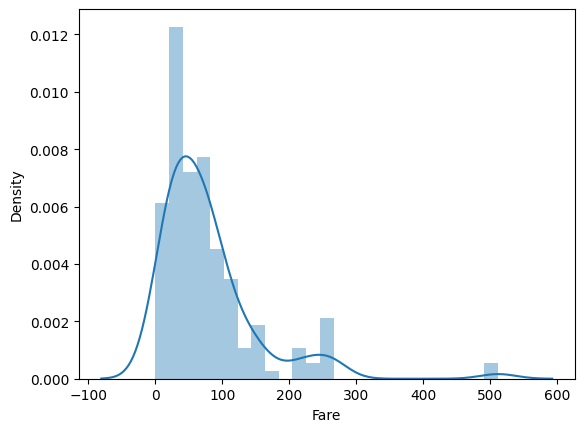

In [87]:
sns.distplot(train[x:='Fare'])

<ipython-input-89-cf8dfad7e6ea>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="SibSp", y="Survived", kind="bar", data=train, ci=None)


Text(0.5, 1.0, 'Survival Rate by Number of Siblings/Spouses Aboard')

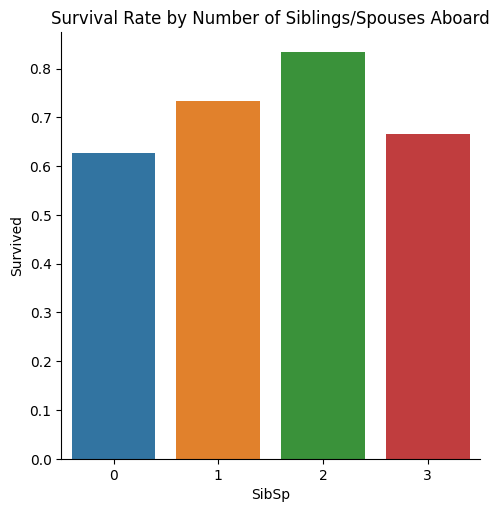

In [89]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=train, ci=None)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')